# ***Import Libraries:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ***Part 1: Data Loading and Preprocessing***

***1. Load the Dataset:***

In [ ]:
#Load the dataset
data = pd.read_csv('onlinefoods.csv')

 ***2. Handle Missing Values:***

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

print("Columns with missing values:")

Columns with missing values:


***3. Encode Categorical Variables:***

In [ ]:
  # One-hot encode categorical columns
  data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback'])

  # Display the encoded DataFrame
  print(data_encoded.head())

   Age  Family size  latitude  longitude  Pin code Unnamed: 12  Gender_Female  \
0   20            4   12.9766    77.5993    560001         Yes              1   
1   24            3   12.9770    77.5773    560009         Yes              1   
2   22            3   12.9551    77.6593    560017         Yes              0   
3   22            6   12.9473    77.5616    560019         Yes              1   
4   22            4   12.9850    77.5533    560010         Yes              0   

   Gender_Male  Marital Status_Married  Marital Status_Prefer not to say  ...  \
0            0                       0                                 0  ...   
1            0                       0                                 0  ...   
2            1                       0                                 0  ...   
3            0                       0                                 0  ...   
4            1                       0                                 0  ...   

   Monthly Income_No Incom

***4. Feature Selection:***

In [ ]:
features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 'longitude', 'Pin code', 'Output']
target = 'Feedback'

# Separating X and y
X = data[features]
y = data[target]

numeric_features = ['Age', 'Family size', 'latitude', 'longitude']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# ***Part 2: Exploratory Data Analysis (EDA)***

***1. Descriptive Statistics:***

In [ ]:
print(data.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


***2. Visualizations***

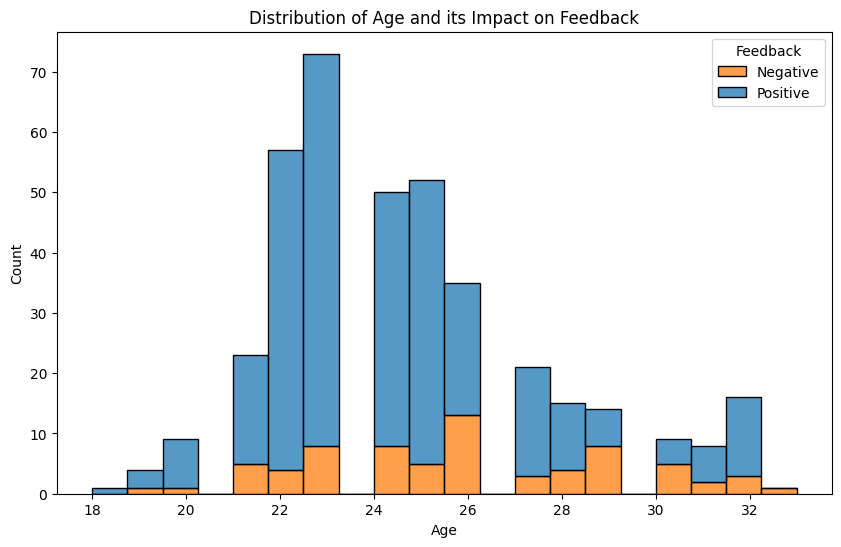

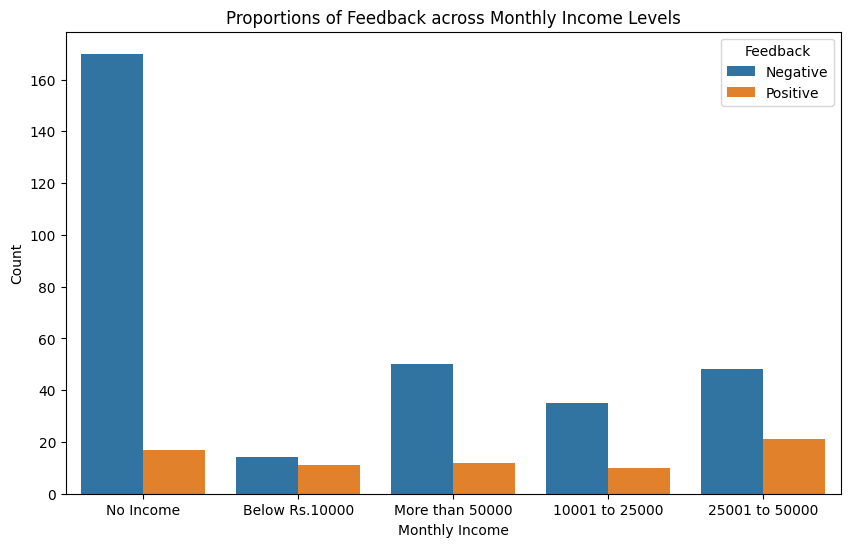

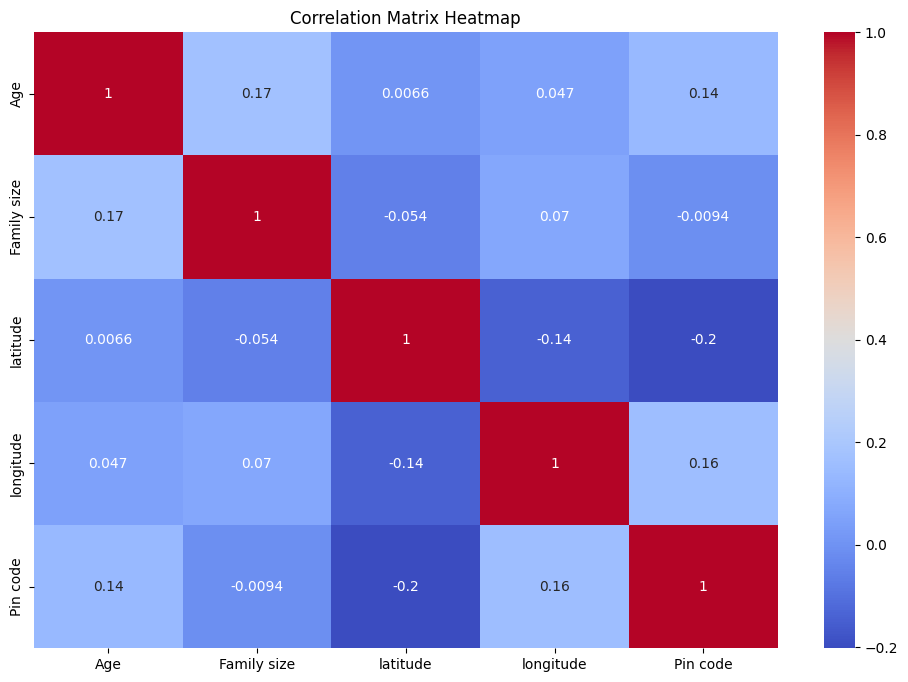

In [ ]:
# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its Impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback', labels=['Negative', 'Positive'])
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# ***Part 3: Logistic Regression Model***


***1. Build the Model:***

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Family size',
                                                   'latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital Status',
                                                   'Occupation',
                                                   'Monthly Income',
                                                   'Educational Qualifications',
                                                   'Output'])])),
                ('classifier', LogisticRegression())])

***2. Model Evaluation:***

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.8717948717948718
Confusion Matrix: 
[[ 6  5]
 [ 5 62]]
Classification Report: 
              precision    recall  f1-score   support

   Negative        0.55      0.55      0.55        11
    Positive       0.93      0.93      0.93        67

    accuracy                           0.87        78
   macro avg       0.74      0.74      0.74        78
weighted avg       0.87      0.87      0.87        78



# ***Part 4: Data Analysis and Visualization***


***1. Feature Importance:***

<ipython-input-176-6558b0f11221>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance_df, palette="viridis")


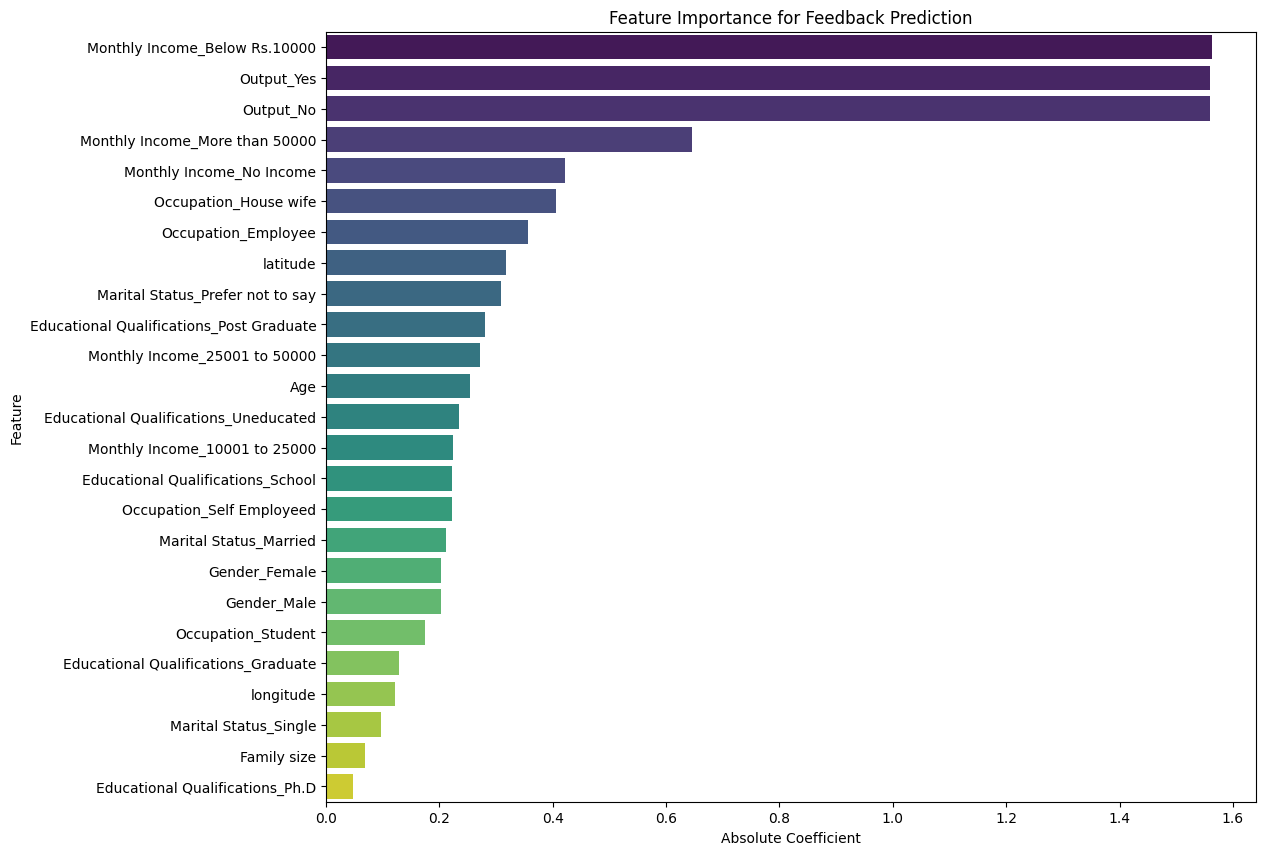

                                     Feature  Coefficient
15             Monthly Income_Below Rs.10000    -1.562682
24                                Output_Yes     1.558738
23                                 Output_No    -1.558727
16            Monthly Income_More than 50000     0.645646
17                  Monthly Income_No Income     0.421462
10                     Occupation_House wife     0.404891
9                        Occupation_Employee    -0.356474
2                                   latitude    -0.317397
7           Marital Status_Prefer not to say    -0.308128
20  Educational Qualifications_Post Graduate     0.280959
14             Monthly Income_25001 to 50000     0.271548
0                                        Age    -0.253381
22     Educational Qualifications_Uneducated    -0.234709
13             Monthly Income_10001 to 25000     0.224037
21         Educational Qualifications_School    -0.222634
11                 Occupation_Self Employeed    -0.222553
6             

In [ ]:
# Get the feature coefficients
feature_coefficients = clf.named_steps['classifier'].coef_[0]
feature_names = np.concatenate([numeric_features, clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)])

# Create a DataFrame to store the coefficients
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Coefficient": feature_coefficients})

# Sort the features by their absolute coefficients
feature_importance_df['Abs_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by="Abs_Coefficient", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Feedback Prediction")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.show()

# Print the feature importance in descending order
print(feature_importance_df[['Feature', 'Coefficient']])

***2. Prediction Insights:***

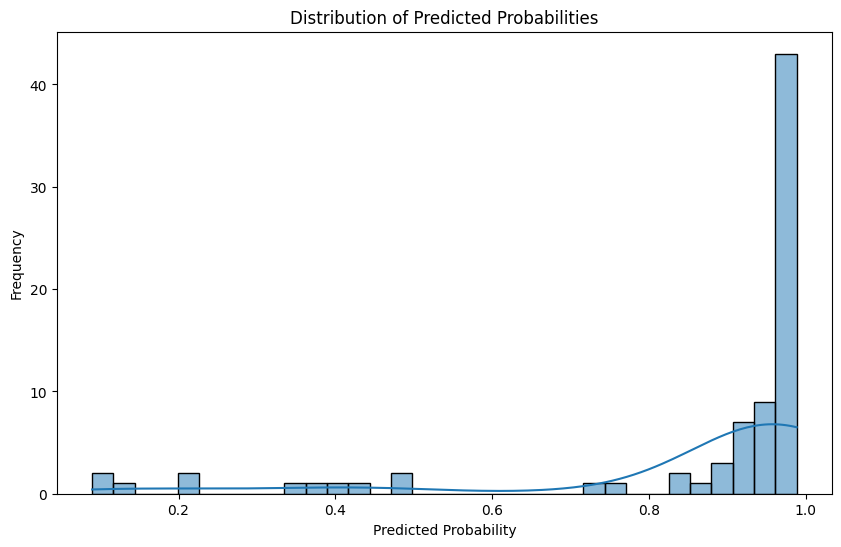

In [ ]:
# Predicted probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()